loading the packages and read the data set

In [6]:
%matplotlib inline
from fbprophet import Prophet
import matplotlib.pyplot as plt
#import datetime as dt
import numpy as np
import pandas as pd
from dateutil.parser import parse
from numpy import inf
import matplotlib.pyplot as plt
import seaborn as sns
#from scipy.optimize import newton
#from scipy.special import psi, polygamma
from scipy.stats import norm, kde, kstest
from numpy import inf,linspace
import statsmodels.formula.api as smf

df = pd.read_csv('google_drive_nanreplaced.csv')

In [7]:
df.head()

,time,1day_active_users,1day_google_documents_active_users,1day_google_drawings_active_users,1day_google_forms_active_users,1day_google_presentations_active_users,1day_google_sites_active_users,1day_google_spreadsheets_active_users,1day_other_types_active_users,30day_active_users,...,owned_items_with_visibility_unknown_delta,owned_items_with_visibility_unknown_removed,owned_other_types_added,owned_other_types_created,owned_other_types_delta,owned_other_types_edited,owned_other_types_removed,owned_other_types_trashed,owned_other_types_viewed,sharers
0,2017-03-12 05:00:00,1543.0,2499.954068,7.240157,54.104987,474.077428,25.604369,1107.56168,1314.187664,15955.695538,...,0.0,0.0,0.0,3509.0,0.0,193.0,0.0,173.0,1173.0,0.0
1,2017-03-14 04:00:00,2495.0,2499.954068,7.240157,54.104987,474.077428,25.604369,1107.56168,1314.187664,15955.695538,...,0.0,0.0,0.0,6275.0,0.0,837.0,0.0,1018.0,1759.0,0.0
2,2017-03-16 04:00:00,2403.0,2499.954068,7.240157,54.104987,474.077428,25.604369,1107.56168,1314.187664,15955.695538,...,0.0,0.0,0.0,22084.0,0.0,820.0,0.0,805.0,1451.0,0.0
3,2017-03-19 04:00:00,2848.0,2499.954068,7.240157,54.104987,474.077428,25.604369,1107.56168,1314.187664,15955.695538,...,0.0,0.0,0.0,51355.0,0.0,725.0,0.0,737.0,1247.0,0.0
4,2017-03-20 04:00:00,5302.0,2499.954068,7.240157,54.104987,474.077428,25.604369,1107.56168,1314.187664,15955.695538,...,0.0,0.0,0.0,9979.0,0.0,1330.0,0.0,924.0,2339.0,0.0


Fitting a linear regression model on to the data 

In [20]:
lg= smf.ols(formula='google_forms_edited ~ google_forms_created', data=df).fit()
lg.params

Intercept               18.557732
google_forms_created     1.769806
dtype: float64

nterpreting Model Coefficients How do we interpret the google_forms_edited ( 𝛽1 )? A "unit" increase is associated with a 1.769806 "unit" increase in google_forms_created.

Using the Model for Prediction Let's say that there are 1000 google_forms_created, then we can roughly predict the number of forms that can be edited
𝑦=𝛽0+𝛽1𝑥

𝑦=18.557732+1.769806(X)

In [26]:
𝑦=18.557732+1.769806*1000
y

1788.363732

In [24]:
#𝑦=𝛽0+𝛽1𝑥
x_new=pd.DataFrame({'google_forms_created':[1000]})
x_new.head()

,google_forms_created
0,1000


predicting te new x based on the model

In [25]:
lg.predict(x_new)

0    1788.364094
dtype: float64

In [27]:
x_new= pd.DataFrame({'google_forms_created':[df.google_forms_created.min(),df.google_forms_created.max()]})
x_new.head()

,google_forms_created
0,0.0
1,251.0


In [28]:
predicts=lg.predict(x_new)
predicts

0     18.557732
1    462.779129
dtype: float64

plotting the classification of two attributes

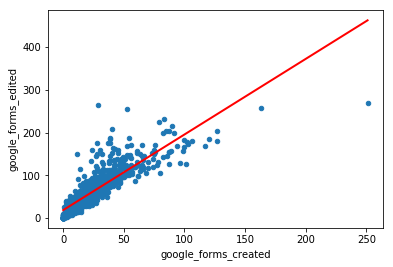

In [29]:
# first, plot the observed data
df.plot(kind='scatter', x='google_forms_created', y='google_forms_edited')

# then, plot the least squares line
plt.plot(x_new, predicts, c='red', linewidth=2)

In [30]:
# print the confidence intervals for the model coefficients
lg.conf_int()

,0,1
Intercept,15.996475,21.118988
google_forms_created,1.696613,1.843000


In [31]:
# print the p-values for the model coefficients
lg.pvalues

Intercept                3.118740e-41
google_forms_created    1.439223e-238
dtype: float64

From the above p values we see that the value are less than 0.05, so we reject the null hypothesis and there is significant corelation between forms_created and forms_edited. 

R-squared is the proportion of variance explained, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the null model. The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.

R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model.

In [32]:
# print the R-squared value for the model
lg.rsquared

0.7309769564422748

Plotting the linear regression models by increasing the polynomial order, the model performed better when n=2, the r^2 value is 0.78

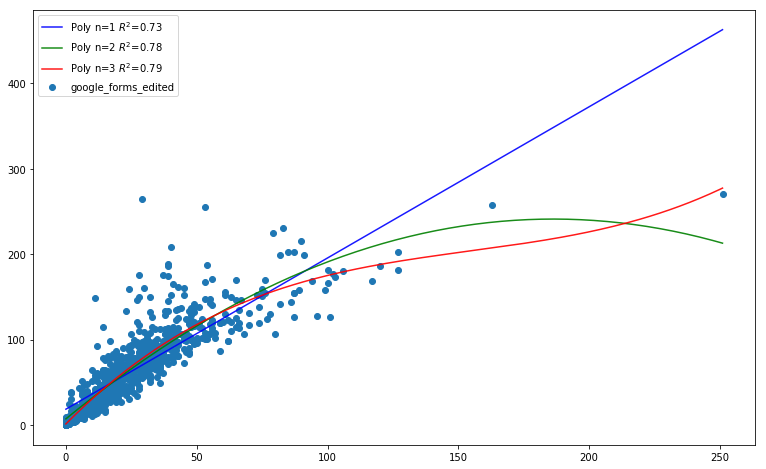

In [34]:
plt.figure(figsize=(8 * 1.618, 8))

plt.scatter(df.google_forms_created, df.google_forms_edited)

df1 = df

poly_1 = smf.ols(formula='google_forms_edited ~ 1 + google_forms_created', data=df).fit()

x = pd.DataFrame({'google_forms_created': np.linspace(df.google_forms_created.min(), df.google_forms_created.max(), 200)})


plt.plot(x.google_forms_created, poly_1.predict(x), 'b-', label='Poly n=1 $R^2$=%.2f' % poly_1.rsquared, alpha=0.9)

# 2-nd order polynomial
poly_2 = smf.ols(formula='google_forms_edited ~ 1 + google_forms_created + I(google_forms_created ** 2.0)', data=df).fit()
plt.plot(x.google_forms_created, poly_2.predict(x), 'g-', label='Poly n=2 $R^2$=%.2f' % poly_2.rsquared, alpha=0.9)

# 3-rd order polynomial
poly_3 = smf.ols(formula='google_forms_edited ~ 1 + google_forms_created + I(google_forms_created ** 2.0) + I(google_forms_created ** 3.0)', data=df).fit()
plt.plot(x.google_forms_created, poly_3.predict(x), 'r-', alpha=0.9, label='Poly n=3 $R^2$=%.2f' % poly_3.rsquared)

plt.legend()